In [16]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
#
import scienceplots
from cmcrameri import cm

plt.style.use(['science', 'grid'])

In [17]:
df = pd.read_csv("data.csv")
# Ensure we are testing diffraction pattern data
df = df.loc[df.seed.str.match('^pattern.*')]
# Filter out train data
df = df.loc[df.phase.str.match('(test|val)')]
df["RMSE"] = np.sqrt(df["MSE"])

# Use epoch 100
df = df.loc[df.epoch == 100]
# Use numbers to take average
df_num = df.select_dtypes(include="number")
df_num = df_num.groupby('code').mean().reset_index()

space_groups = pd.read_csv("space_groups.csv", index_col="ICSD_code").to_dict()["space_group"]
print(space_groups)
print(df_num)
groups = sorted(df.group.unique())

{1000: 'F m -3 m', 100018: 'P -4 3 n', 10009: 'F -4 3 m', 100098: 'I 2 3', 100099: 'I 2 3', 1001: 'F m -3 m', 100102: 'P -4 3 n', 100149: 'I -4 3 d', 100174: 'I -4 3 d', 100179: 'I -4 3 m', 100195: 'F d -3 m Z', 100202: 'P a -3', 100219: 'P 21 3', 100258: 'I a -3 d', 100267: 'F -4 3 m', 100268: 'F -4 3 m', 100290: 'I -4 3 m', 100309: 'F -4 3 m', 10035: 'F d -3 m S', 100393: 'F d -3 m Z', 100401: 'P a -3', 100420: 'P 21 3', 10046: 'P 41 3 2', 100510: 'P a -3', 100517: 'P n -3 Z', 100518: 'F d -3 m Z', 10052: 'F m -3 m', 100522: 'I -4 3 d', 100529: 'F d -3 m Z', 100530: 'F d -3 m Z', 100531: 'F d -3 m Z', 100532: 'F d -3 m Z', 100544: 'F d -3 m Z', 100545: 'F d -3 m Z', 100547: 'F d -3 m Z', 100548: 'F d -3 m Z', 100549: 'F d -3 m Z', 100550: 'F d -3 m Z', 100551: 'F d -3 m Z', 100552: 'F d -3 m Z', 100569: 'I 2 3', 100570: 'I 2 3', 100614: 'I a -3 d', 100615: 'I a -3 d', 100616: 'I a -3 d', 100617: 'I a -3 d', 100618: 'I a -3 d', 100619: 'I a -3 d', 100620: 'I a -3 d', 100621: 'I a -3 d

In [18]:
data = []
for group in groups:
    group_data = []
    for c, g in space_groups.items():
        if g == group:
            try:
                group_data.append(float(df_num.loc[df_num.code == c]["RMSE"]))
            except:
                pass
    data.append(group_data)

C:\Users\joe\AppData\Local\Temp\ipykernel_22920\2587333632.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  group_data.append(float(df_num.loc[df_num.code == c]["RMSE"]))


C:\Users\joe\AppData\Local\Temp\ipykernel_22920\1201951197.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([g for g in groups], rotation='vertical')


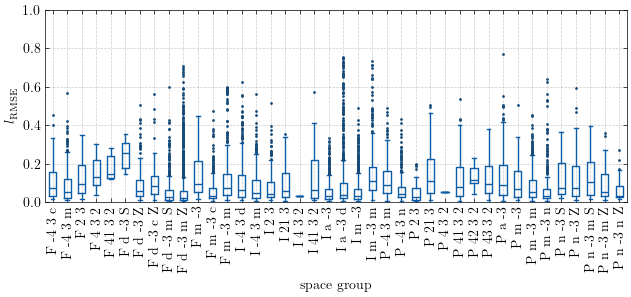

In [19]:
fig, ax = plt.subplots(figsize=(7.5, 2.5))
pparam = dict(xlabel=r'space group', ylabel=r'$l_\text{RMSE}$')
plt.minorticks_off()
plt.grid(alpha=0.2)
plt.margins(0, 0)
ax.set(**pparam)
ax.set_xticklabels([g for g in groups], rotation='vertical')
ax.set_ylim([0, 1])

black = dict(color="#0C5DA5")
boxes = ax.boxplot(data, boxprops=black, medianprops=black, whiskerprops=black, capprops=black)
for f in boxes['fliers']:
    f.set_markeredgecolor("#164a78")
    f.set_markersize(2)
    # f.set_alpha(1)
    # f.set_markeredgecolor("None")
    f.set_marker('.')

fig.savefig('figures/boxplots_pattern', dpi=1200)

{1000: 'F m -3 m', 100018: 'P -4 3 n', 10009: 'F -4 3 m', 100098: 'I 2 3', 100099: 'I 2 3', 1001: 'F m -3 m', 100102: 'P -4 3 n', 100149: 'I -4 3 d', 100174: 'I -4 3 d', 100179: 'I -4 3 m', 100195: 'F d -3 m Z', 100202: 'P a -3', 100219: 'P 21 3', 100258: 'I a -3 d', 100267: 'F -4 3 m', 100268: 'F -4 3 m', 100290: 'I -4 3 m', 100309: 'F -4 3 m', 10035: 'F d -3 m S', 100393: 'F d -3 m Z', 100401: 'P a -3', 100420: 'P 21 3', 10046: 'P 41 3 2', 100510: 'P a -3', 100517: 'P n -3 Z', 100518: 'F d -3 m Z', 10052: 'F m -3 m', 100522: 'I -4 3 d', 100529: 'F d -3 m Z', 100530: 'F d -3 m Z', 100531: 'F d -3 m Z', 100532: 'F d -3 m Z', 100544: 'F d -3 m Z', 100545: 'F d -3 m Z', 100547: 'F d -3 m Z', 100548: 'F d -3 m Z', 100549: 'F d -3 m Z', 100550: 'F d -3 m Z', 100551: 'F d -3 m Z', 100552: 'F d -3 m Z', 100569: 'I 2 3', 100570: 'I 2 3', 100614: 'I a -3 d', 100615: 'I a -3 d', 100616: 'I a -3 d', 100617: 'I a -3 d', 100618: 'I a -3 d', 100619: 'I a -3 d', 100620: 'I a -3 d', 100621: 'I a -3 d

C:\Users\joe\AppData\Local\Temp\ipykernel_22920\4047335976.py:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  group_data.append(float(df_num.loc[df_num.code == c]["RMSE"]))
C:\Users\joe\AppData\Local\Temp\ipykernel_22920\4047335976.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([g for g in groups], rotation='vertical')


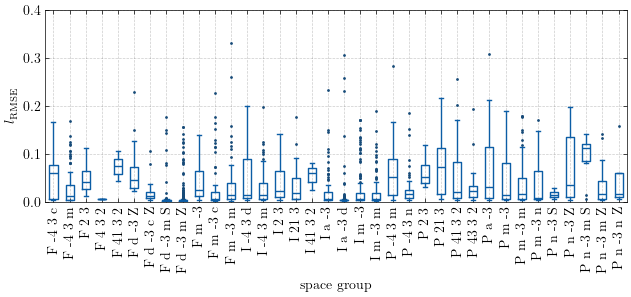

: 

In [20]:
df = pd.read_csv("data.csv")
# Ensure we are testing diffraction pattern data
df = df.loc[df.seed.str.match('^structure.*')]
# Filter out train data
df = df.loc[df.phase.str.match('(test|val)')]

df["RMSE"] = np.sqrt(df["MSE"])

# Use epoch 100
df = df.loc[df.epoch == 100]
# Use numbers to take average
df_num = df.select_dtypes(include="number")
df_num = df_num.groupby('code').mean().reset_index()

space_groups = pd.read_csv("space_groups.csv", index_col="ICSD_code").to_dict()["space_group"]
print(space_groups)
print(df_num)
groups = sorted(df.group.unique())
data = []
for group in groups:
    group_data = []
    for c, g in space_groups.items():
        if g == group:
            try:
                group_data.append(float(df_num.loc[df_num.code == c]["RMSE"]))
            except:
                pass
    data.append(group_data)
fig, ax = plt.subplots(figsize=(7.5, 2.5))
pparam = dict(xlabel=r'space group', ylabel=r'$l_\text{RMSE}$')
plt.minorticks_off()
plt.grid(alpha=0.2)
plt.margins(0, 0)
ax.set(**pparam)
ax.set_xticklabels([g for g in groups], rotation='vertical')
ax.set_ylim([0, 0.4])

black = dict(color="#0C5DA5")
boxes = ax.boxplot(data, boxprops=black, medianprops=black, whiskerprops=black, capprops=black)
for f in boxes['fliers']:
    f.set_markeredgecolor("#164a78")
    f.set_markersize(2)
    # f.set_alpha(1)
    # f.set_markeredgecolor("None")
    f.set_marker('.')

fig.savefig('figures/boxplots_structure', dpi=1200)